## import the library

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression


## load the datasett

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,category_1,category_2,target
0,0.496714,1.146509,-0.648521,0.833005,0.784920,-2.209437,-1.300105,-2.242241,Above Average,Region C,1
1,-0.138264,-0.061846,NaN,0.403768,0.704674,-2.498565,-1.339227,-1.942298,Below Average,Region A,0
2,0.647689,1.395115,-0.764126,1.708266,-0.250029,1.956259,1.190238,1.503559,High,Region C,1
3,1.523030,2.657560,-2.461653,2.649051,0.882201,3.445638,2.120913,3.409035,High,Region B,1
4,-0.234153,-0.499391,0.576097,-0.441656,0.610601,0.211425,0.935759,-0.401463,Below Average,Region C,0
...,...,...,...,...,...,...,...,...,...,...,...
8995,0.101630,0.400250,NaN,-0.019412,-0.063150,0.077627,0.540975,-0.169030,Above Average,Region A,0
8996,1.167218,2.177774,-1.716067,1.994835,0.350043,-0.544915,0.089050,-0.944220,High,Region C,1
8997,1.588447,3.333945,-2.615488,3.476880,-0.933276,2.027658,0.239583,1.951491,High,Region C,1
8998,-0.684987,-1.599835,1.063341,-1.252109,-0.724001,2.228943,0.989794,1.936476,Low,Region B,0


## dataset

In [66]:
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,category_1,category_2,target
0,0.496714,1.146509,-0.648521,0.833005,0.784920,-2.209437,-1.300105,-2.242241,Above Average,Region C,1
1,-0.138264,-0.061846,0.005196,0.403768,0.704674,-2.498565,-1.339227,-1.942298,Below Average,Region A,0
2,0.647689,1.395115,-0.764126,1.708266,-0.250029,1.956259,1.190238,1.503559,High,Region C,1
3,1.523030,2.657560,-2.461653,2.649051,0.882201,3.445638,2.120913,3.409035,High,Region B,1
4,-0.234153,-0.499391,0.576097,-0.441656,0.610601,0.211425,0.935759,-0.401463,Below Average,Region C,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_1   9000 non-null   float64
 1   feature_2   9000 non-null   float64
 2   feature_3   8600 non-null   float64
 3   feature_4   9000 non-null   float64
 4   feature_5   9000 non-null   float64
 5   feature_6   8500 non-null   float64
 6   feature_7   9000 non-null   float64
 7   feature_8   9000 non-null   float64
 8   category_1  9000 non-null   object 
 9   category_2  9000 non-null   object 
 10  target      9000 non-null   int64  
dtypes: float64(8), int64(1), object(2)
memory usage: 773.6+ KB


In [6]:
df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,target
count,9000.000000,9000.000000,8600.000000,9000.000000,9000.000000,8500.000000,9000.000000,9000.000000,9000.000000
mean,0.000427,0.003349,0.003235,-0.008481,-0.002177,-0.006447,0.000592,0.003348,0.475444
std,1.241318,2.508324,1.542901,2.061784,0.577415,1.981615,1.075064,2.043643,0.499424
min,-18.665400,-37.852816,-6.676680,-8.190124,-0.999791,-8.590782,-4.422265,-9.474989,0.000000
25%,-0.680062,-1.382610,-1.022085,-1.399928,-0.502614,-1.329040,-0.700078,-1.356620,0.000000
50%,-0.003938,-0.016698,0.005196,-0.019541,0.001695,-0.003137,-0.000097,-0.007584,0.000000
75%,0.680513,1.380228,1.038571,1.394151,0.497004,1.324897,0.731942,1.402024,1.000000
max,21.934496,47.603454,6.203055,8.189001,0.999914,6.803751,3.857219,7.572578,1.000000


In [7]:
df.isnull().sum()

feature_1       0
feature_2       0
feature_3     400
feature_4       0
feature_5       0
feature_6     500
feature_7       0
feature_8       0
category_1      0
category_2      0
target          0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.columns

Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'category_1', 'category_2',
       'target'],
      dtype='object')

In [10]:
df['category_1'].value_counts() 

category_1
Low              2802
High             2763
Above Average    1727
Below Average    1708
Name: count, dtype: int64

In [11]:
df['category_2'].value_counts()

category_2
Region B    3618
Region A    3551
Region C    1831
Name: count, dtype: int64

In [12]:
df['target'].value_counts()

target
0    4721
1    4279
Name: count, dtype: int64

In [13]:
# fill null
imputer = SimpleImputer(strategy='median')
df[['feature_3', 'feature_6']] = imputer.fit_transform(df[['feature_3', 'feature_6']])

In [14]:
df.isnull().sum()

feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
category_1    0
category_2    0
target        0
dtype: int64

In [15]:
df.columns

Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'category_1', 'category_2',
       'target'],
      dtype='object')

## outliers

(-40.0, 45.0)

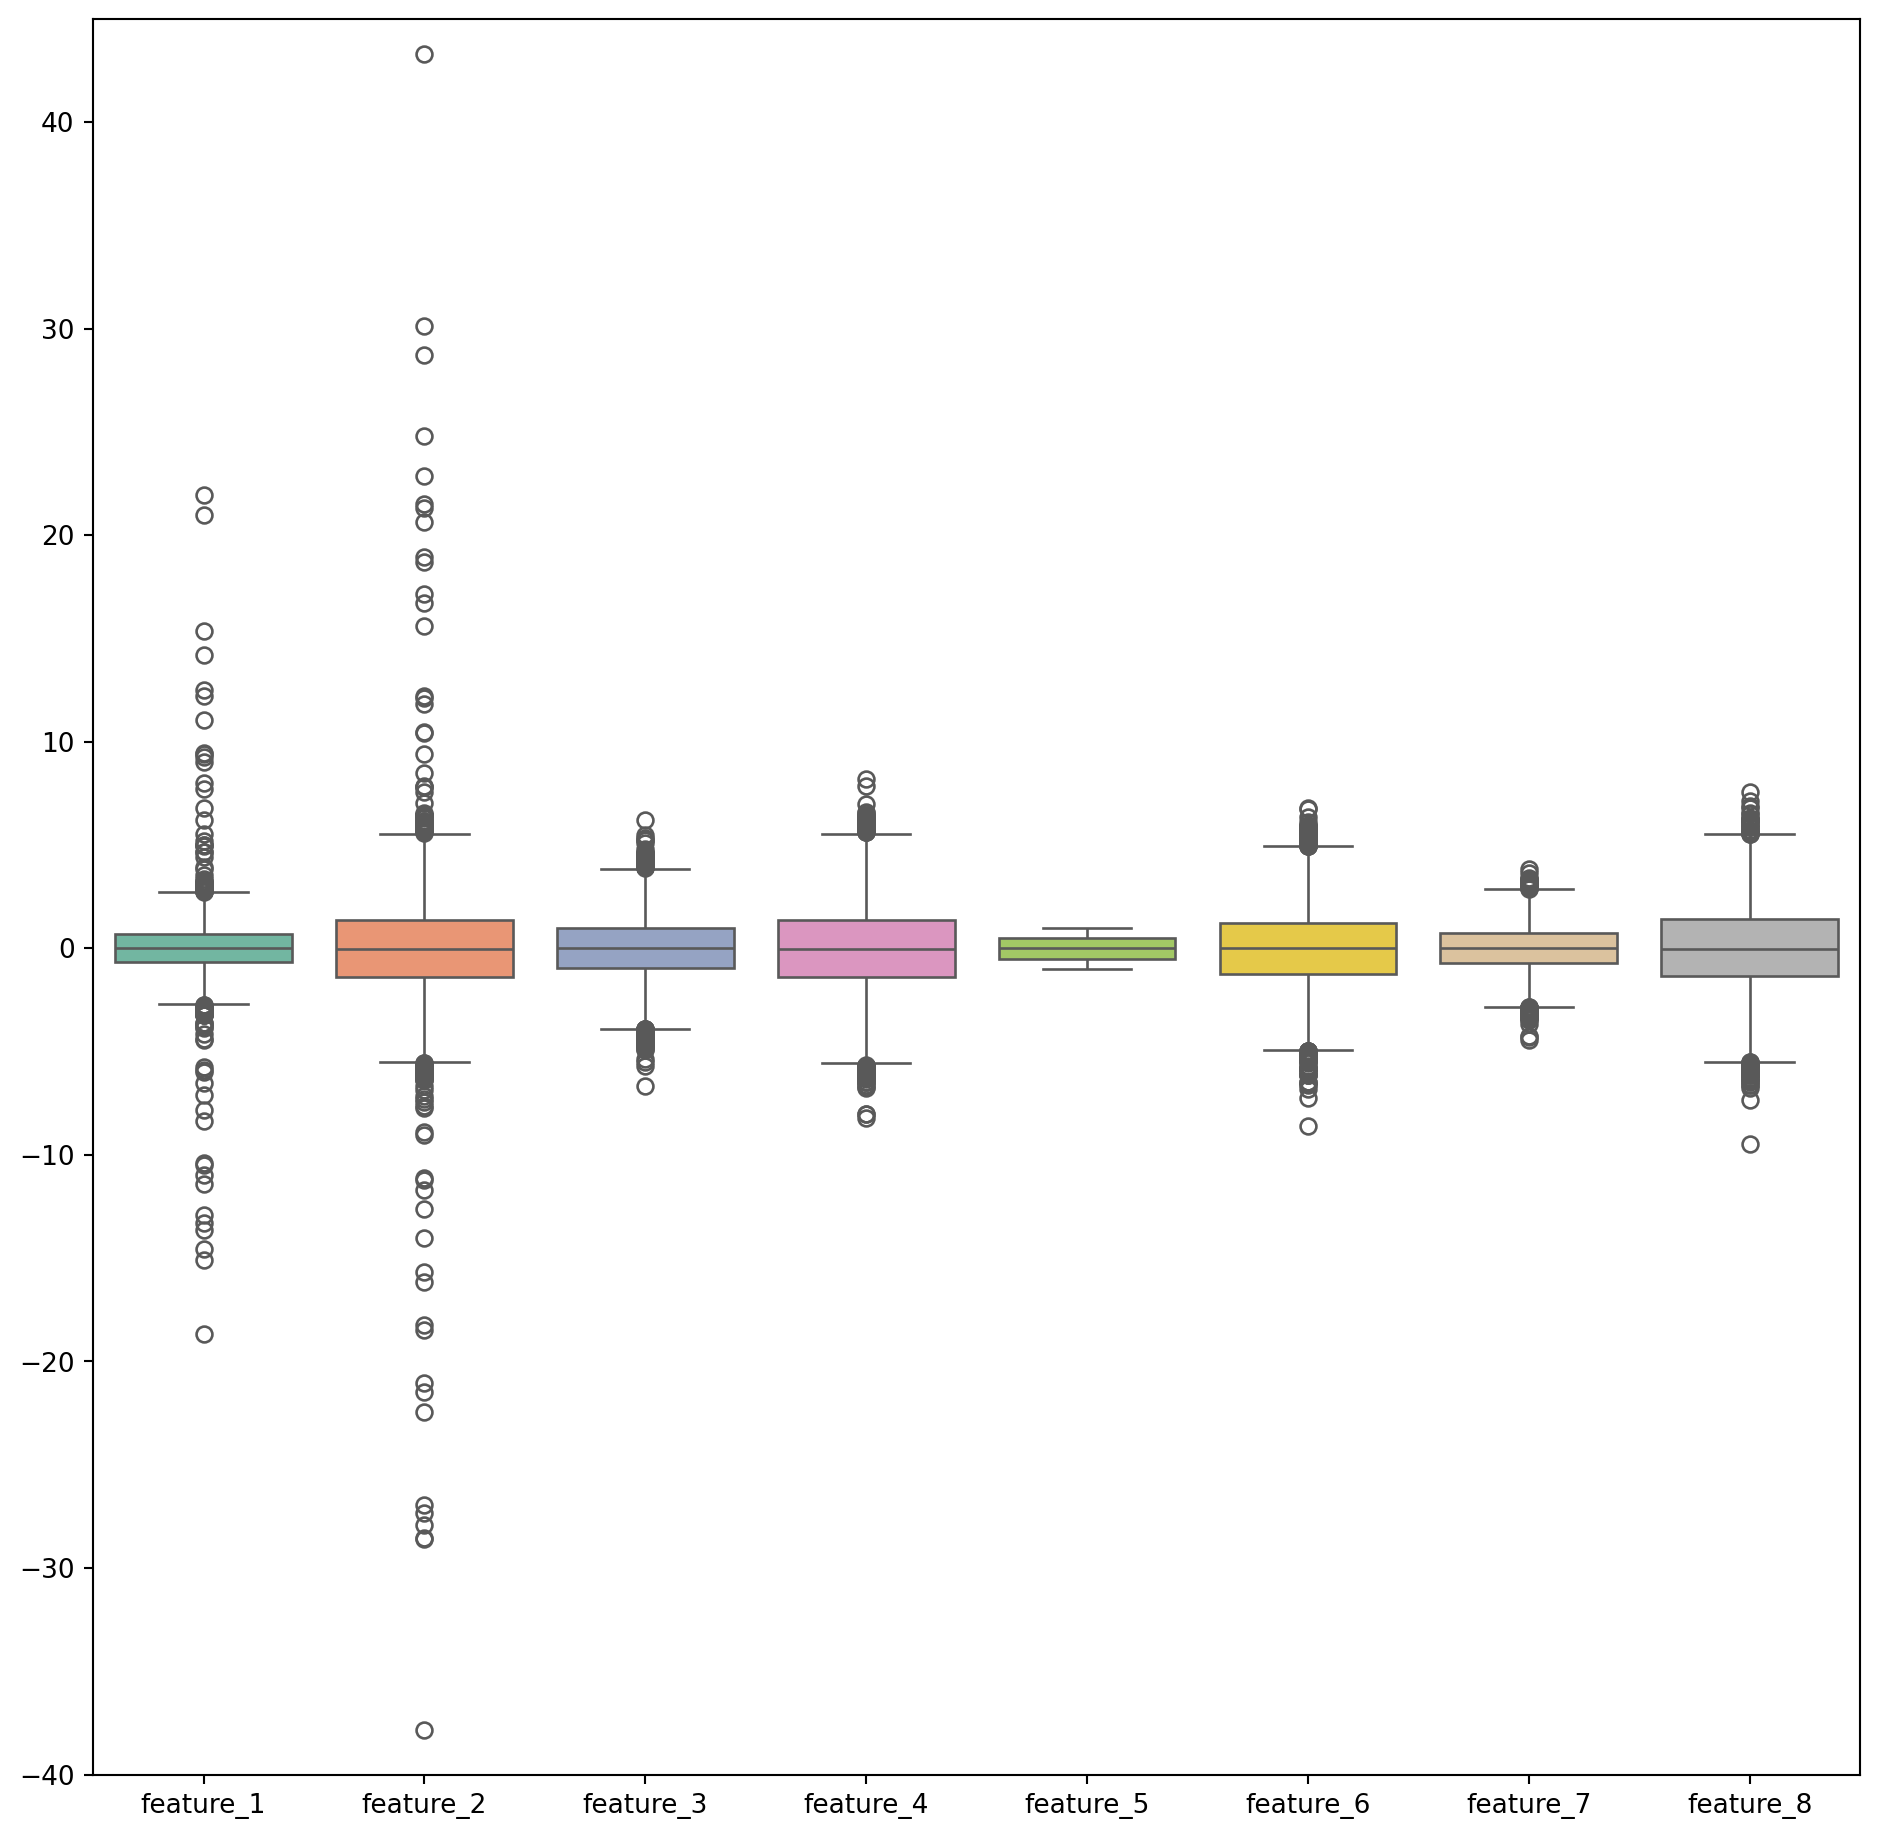

In [16]:
plt.figure(figsize=(12,12), dpi=190)
sb.boxplot(data=df[['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8' ]], palette='Set2')
plt.ylim(-40,45)


In [17]:
def winsorize(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return column.clip(lower, upper)

features_to_process = ['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_6', 'feature_7', 'feature_8']
for feature in features_to_process:
    df[feature] = winsorize(df[feature])

<Axes: >

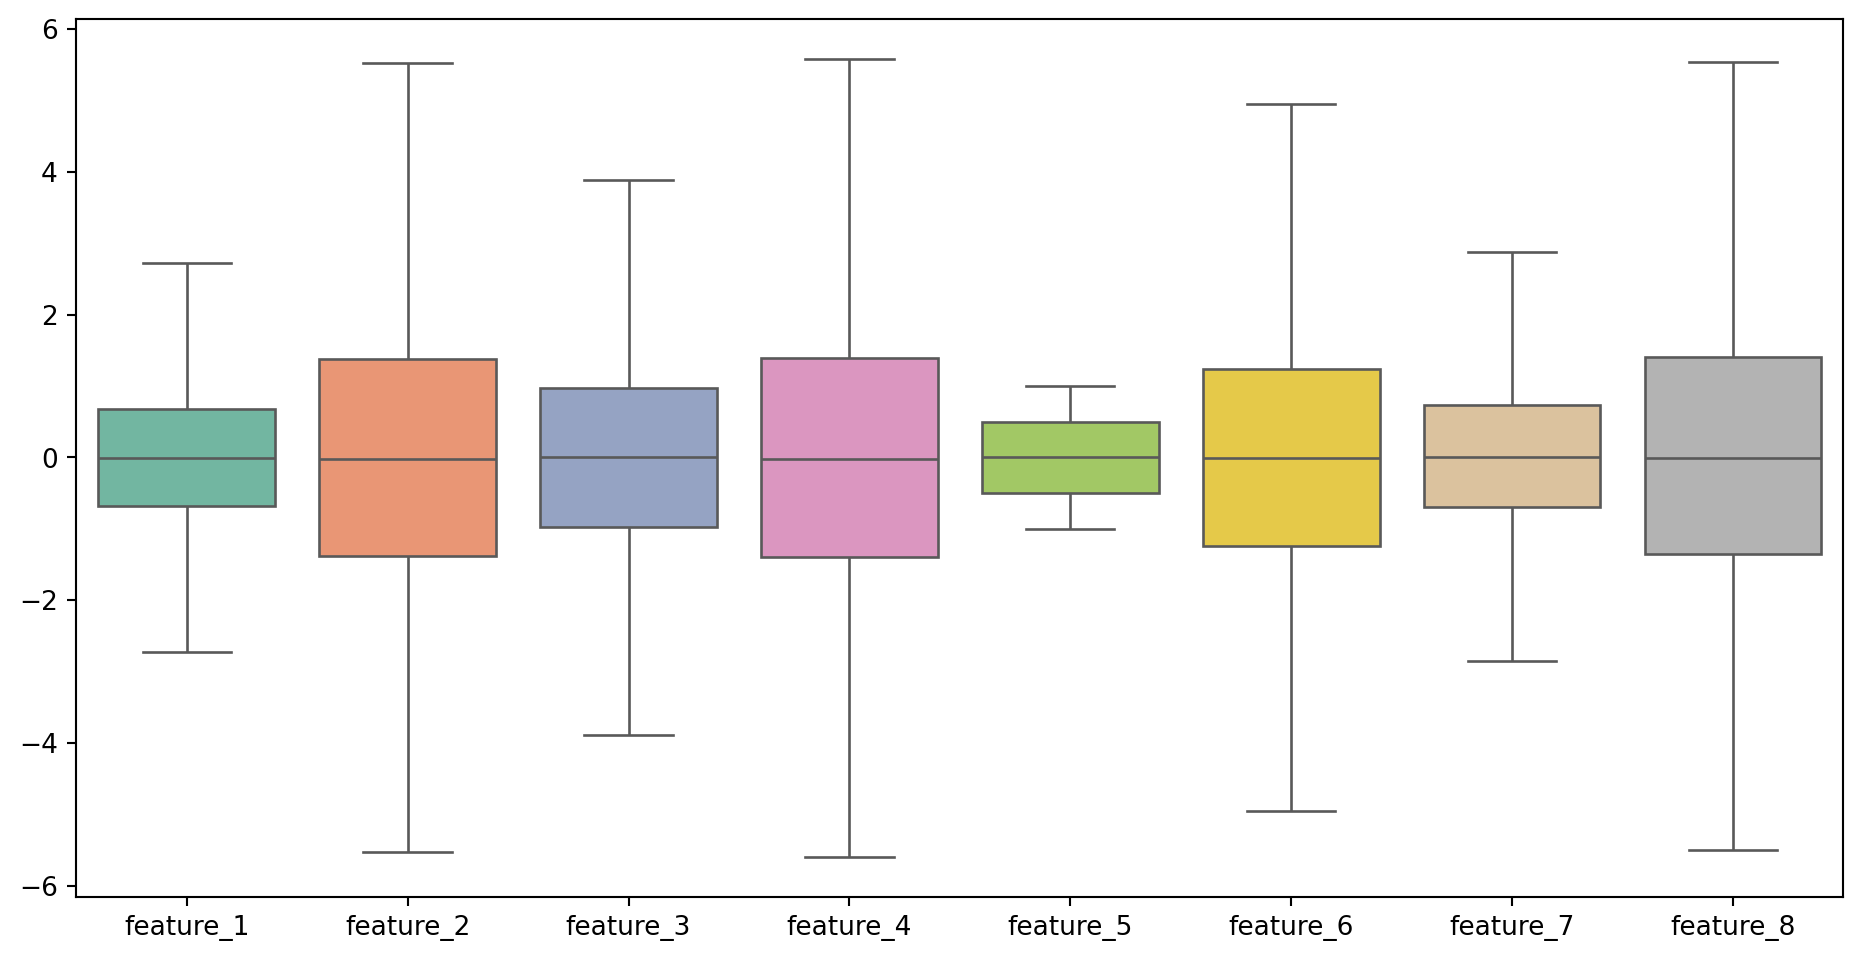

In [18]:
plt.figure(figsize=(12,6), dpi=190)
sb.boxplot(data=df[['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8']], palette='Set2')


## data cleaning


In [19]:
df.columns

Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'category_1', 'category_2',
       'target'],
      dtype='object')

In [20]:
df_encoded = pd.get_dummies(df, columns=['category_1', 'category_2'], drop_first=True, dtype=int)


In [ ]:
df_encoded = pd.get_dummies(df, columns=['category_1', 'category_2'], drop_first=True, dtype=int)

df_encoded = df_encoded.rename(columns={
    'category_1_Below Average': 'Below_Average',
    'category_1_High': 'High',
    'category_1_Low': 'Low',
    'category_2_Region B': 'Region_B',
    'category_2_Region C': 'Region_C'})


In [22]:
df_encoded

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,target,Below_Average,High,Low,Region_B,Region_C
0,0.496714,1.146509,-0.648521,0.833005,0.784920,-2.209437,-1.300105,-2.242241,1,0,0,0,0,1
1,-0.138264,-0.061846,0.005196,0.403768,0.704674,-2.498565,-1.339227,-1.942298,0,1,0,0,0,0
2,0.647689,1.395115,-0.764126,1.708266,-0.250029,1.956259,1.190238,1.503559,1,0,1,0,0,1
3,1.523030,2.657560,-2.461653,2.649051,0.882201,3.445638,2.120913,3.409035,1,0,1,0,1,0
4,-0.234153,-0.499391,0.576097,-0.441656,0.610601,0.211425,0.935759,-0.401463,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,0.101630,0.400250,0.005196,-0.019412,-0.063150,0.077627,0.540975,-0.169030,0,0,0,0,0,0
8996,1.167218,2.177774,-1.716067,1.994835,0.350043,-0.544915,0.089050,-0.944220,1,0,1,0,0,1
8997,1.588447,3.333945,-2.615488,3.476880,-0.933276,2.027658,0.239583,1.951491,1,0,1,0,0,1
8998,-0.684987,-1.599835,1.063341,-1.252109,-0.724001,2.228943,0.989794,1.936476,0,0,0,1,1,0


## skew

In [23]:
df_encoded.skew()

feature_1        0.009027
feature_2        0.009429
feature_3       -0.001339
feature_4        0.018569
feature_5       -0.008142
feature_6       -0.025151
feature_7       -0.030700
feature_8       -0.019514
target           0.098357
Below_Average    1.582525
High             0.836997
Low              0.815042
Region_B         0.399820
Region_C         1.473593
dtype: float64

## kurtosis

In [24]:
df_encoded.kurtosis()

feature_1       -0.064427
feature_2       -0.063458
feature_3       -0.084315
feature_4       -0.127841
feature_5       -1.204675
feature_6       -0.059066
feature_7       -0.142957
feature_8       -0.143717
target          -1.990768
Below_Average    0.504497
High            -1.299725
Low             -1.336003
Region_B        -1.840553
Region_C         0.171514
dtype: float64

## corr matrix

#### deletes

In [25]:
df_encoded = df_encoded.drop(columns=['target','Below_Average','High','Low','Region_B','Region_C'], axis=1)

In [26]:
df_corr = df_encoded.corr()

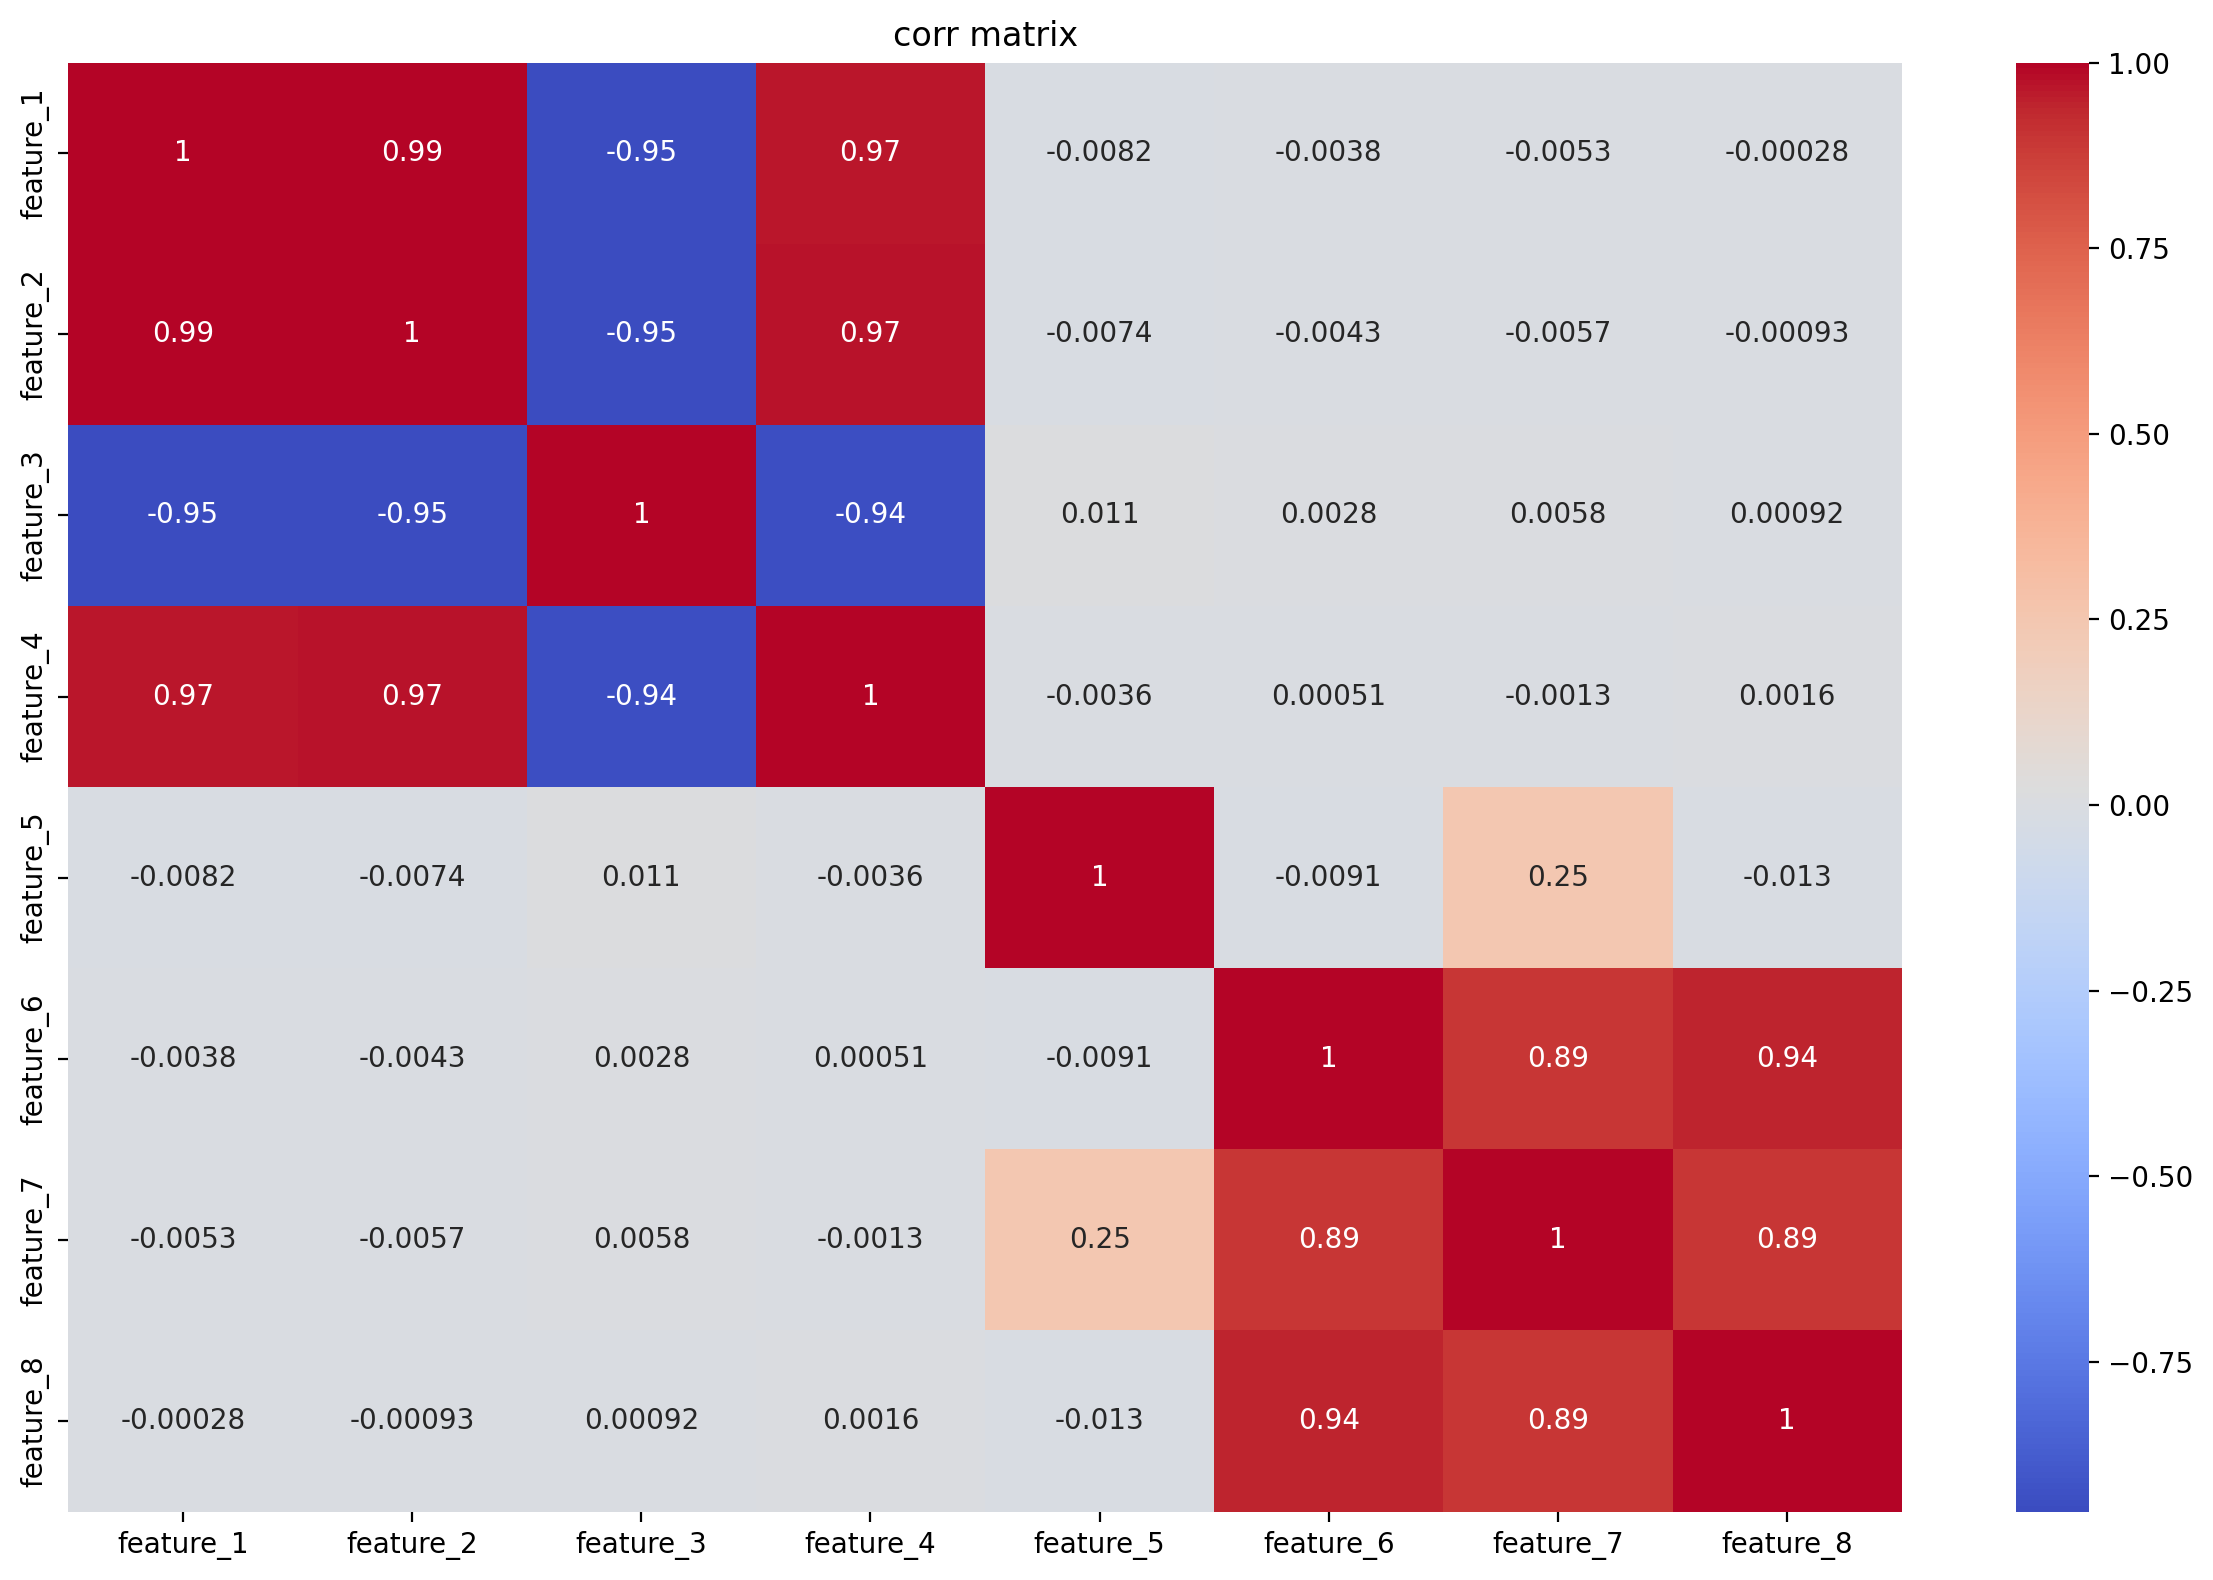

In [27]:
plt.figure(figsize=(12, 8), dpi=200)
sb.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.title("corr matrix")
plt.tight_layout()
plt.show()

In [28]:
df_encoded = df_encoded.drop(columns=['feature_2','feature_3','feature_4','feature_7','feature_8'], axis=1)

In [29]:
df_corr = df_encoded.corr()

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

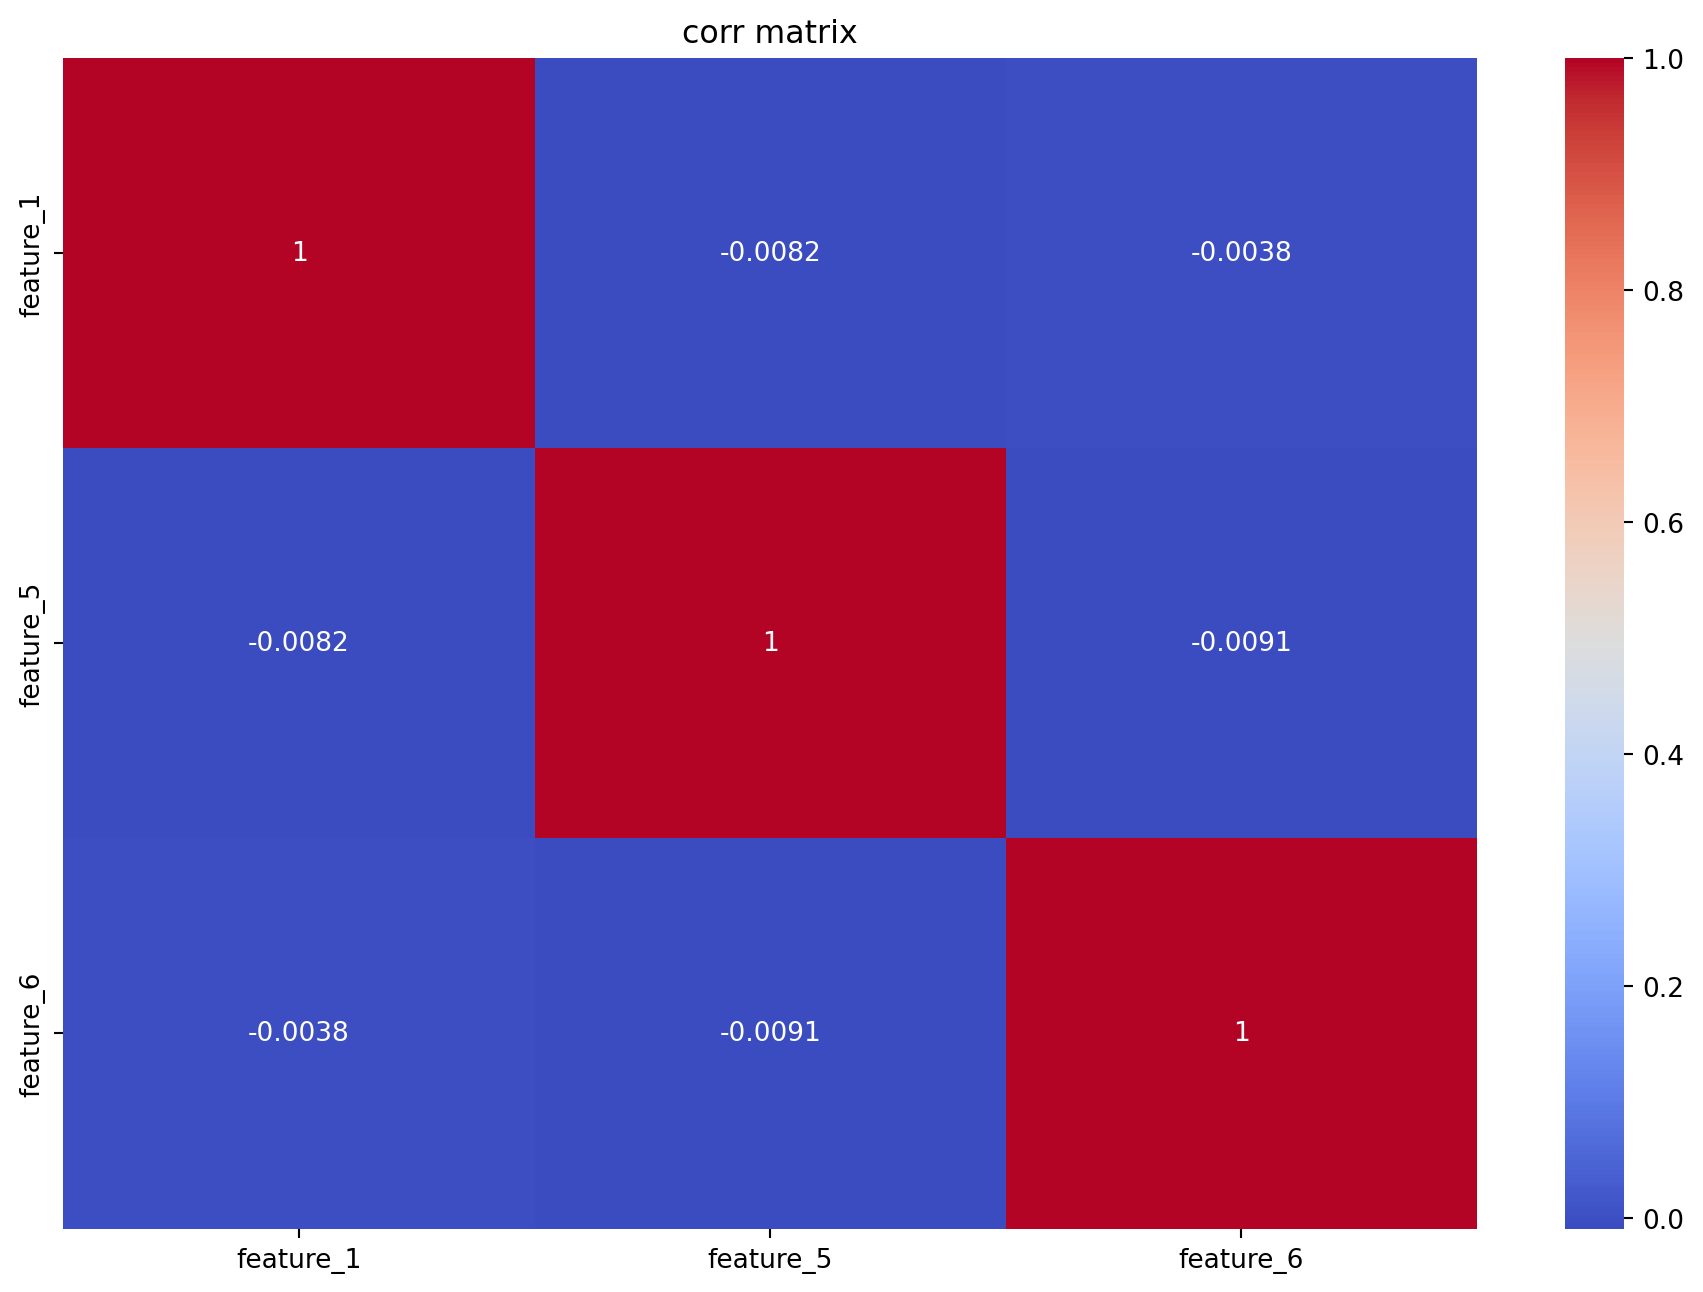

In [30]:
plt.figure(figsize=(12,8), dpi=190)
sb.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.title('corr matrix')
plt.tight_layout

## eda


<Axes: ylabel='Count'>

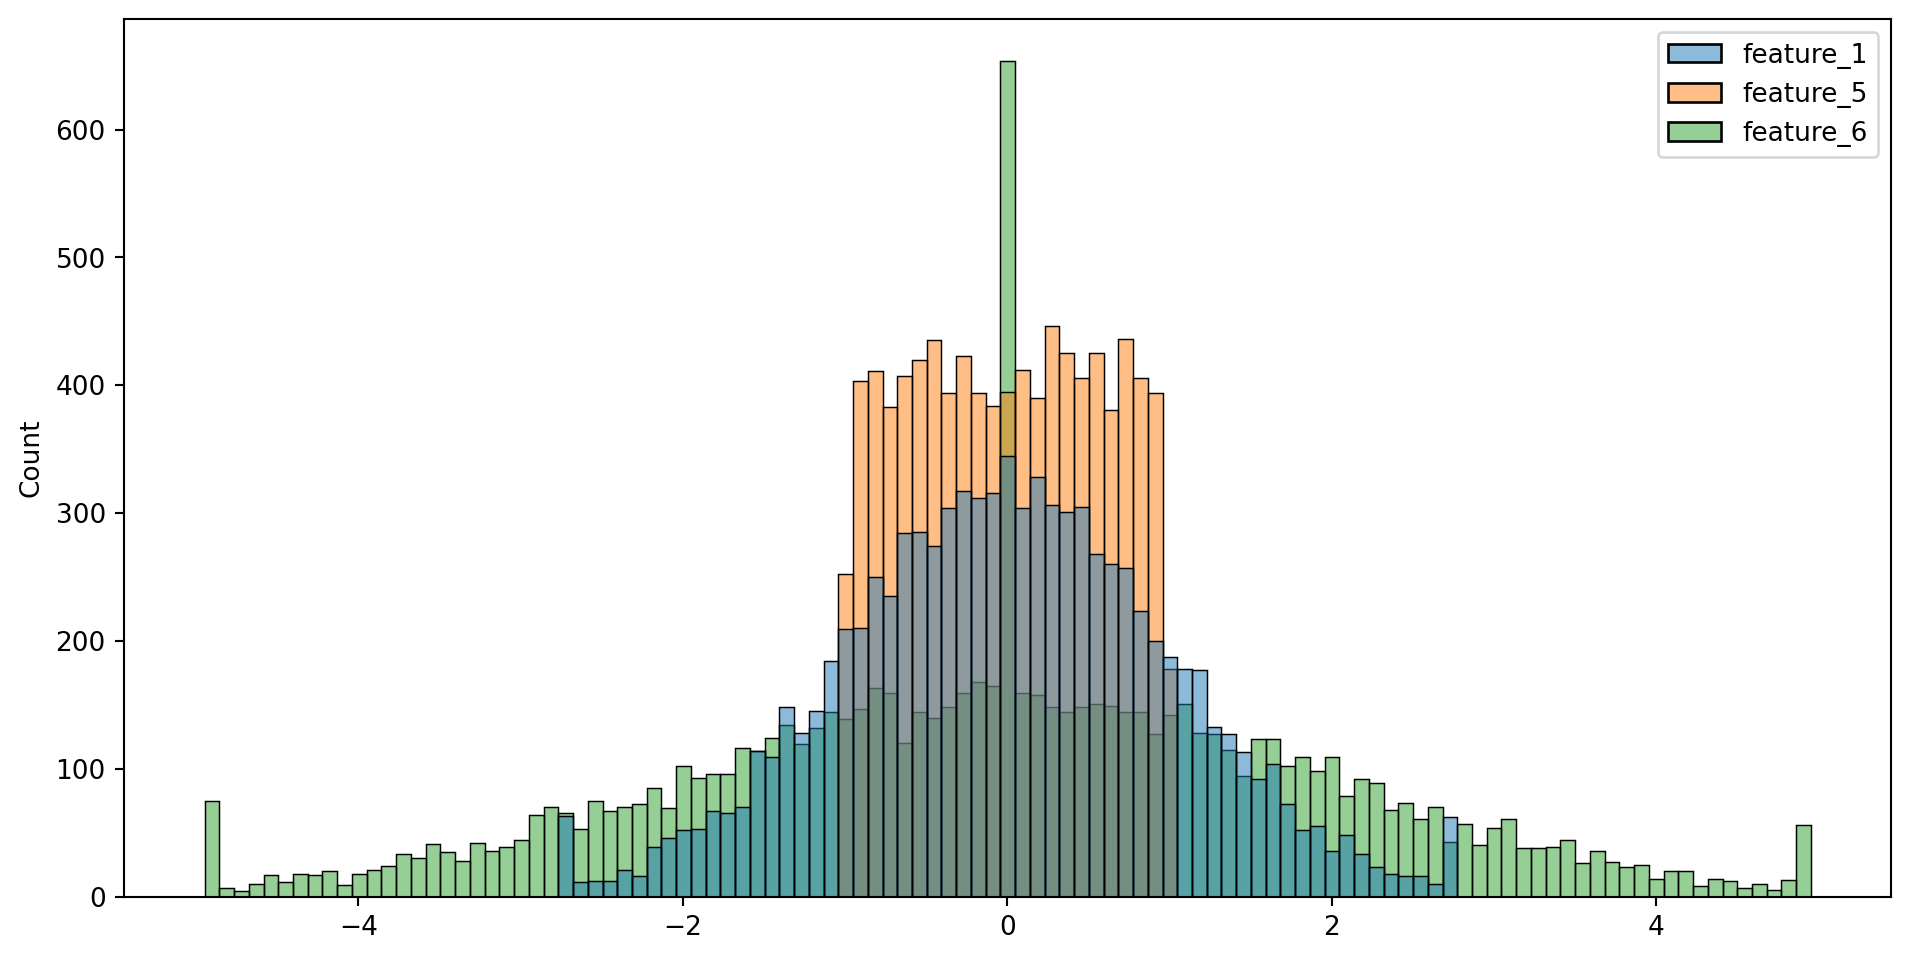

In [31]:
plt.figure(figsize=(12,6), dpi=190)
sb.histplot(data=df_encoded)

In [32]:
df.columns

Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'category_1', 'category_2',
       'target'],
      dtype='object')

я сделаю скопирую df, отфилтрую, заменю на медиан, выбросы удалю не нужные , и буду визуализацию , модели 

In [33]:
df_model = df.copy()

In [34]:
df_model = df_model.drop(columns=['feature_2','feature_3','feature_4','feature_7','feature_8'])

In [35]:
df_model = pd.get_dummies(df_model, columns=['category_1', 'category_2'], drop_first=True, dtype=int)


In [36]:
df_model

,feature_1,feature_5,feature_6,target,category_1_Below Average,category_1_High,category_1_Low,category_2_Region B,category_2_Region C
0,0.496714,0.784920,-2.209437,1,0,0,0,0,1
1,-0.138264,0.704674,-2.498565,0,1,0,0,0,0
2,0.647689,-0.250029,1.956259,1,0,1,0,0,1
3,1.523030,0.882201,3.445638,1,0,1,0,1,0
4,-0.234153,0.610601,0.211425,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
8995,0.101630,-0.063150,0.077627,0,0,0,0,0,0
8996,1.167218,0.350043,-0.544915,1,0,1,0,0,1
8997,1.588447,-0.933276,2.027658,1,0,1,0,0,1
8998,-0.684987,-0.724001,2.228943,0,0,0,1,1,0


In [37]:
df_model = df_model.rename(columns={'category_1_Below Average': 'Below_Average','category_1_High': 'High','category_1_Low': 'Low','category_2_Region B': 'Region_B','category_2_Region C': 'Region_C'})

In [38]:
df_model

,feature_1,feature_5,feature_6,target,Below_Average,High,Low,Region_B,Region_C
0,0.496714,0.784920,-2.209437,1,0,0,0,0,1
1,-0.138264,0.704674,-2.498565,0,1,0,0,0,0
2,0.647689,-0.250029,1.956259,1,0,1,0,0,1
3,1.523030,0.882201,3.445638,1,0,1,0,1,0
4,-0.234153,0.610601,0.211425,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
8995,0.101630,-0.063150,0.077627,0,0,0,0,0,0
8996,1.167218,0.350043,-0.544915,1,0,1,0,0,1
8997,1.588447,-0.933276,2.027658,1,0,1,0,0,1
8998,-0.684987,-0.724001,2.228943,0,0,0,1,1,0


<Axes: >

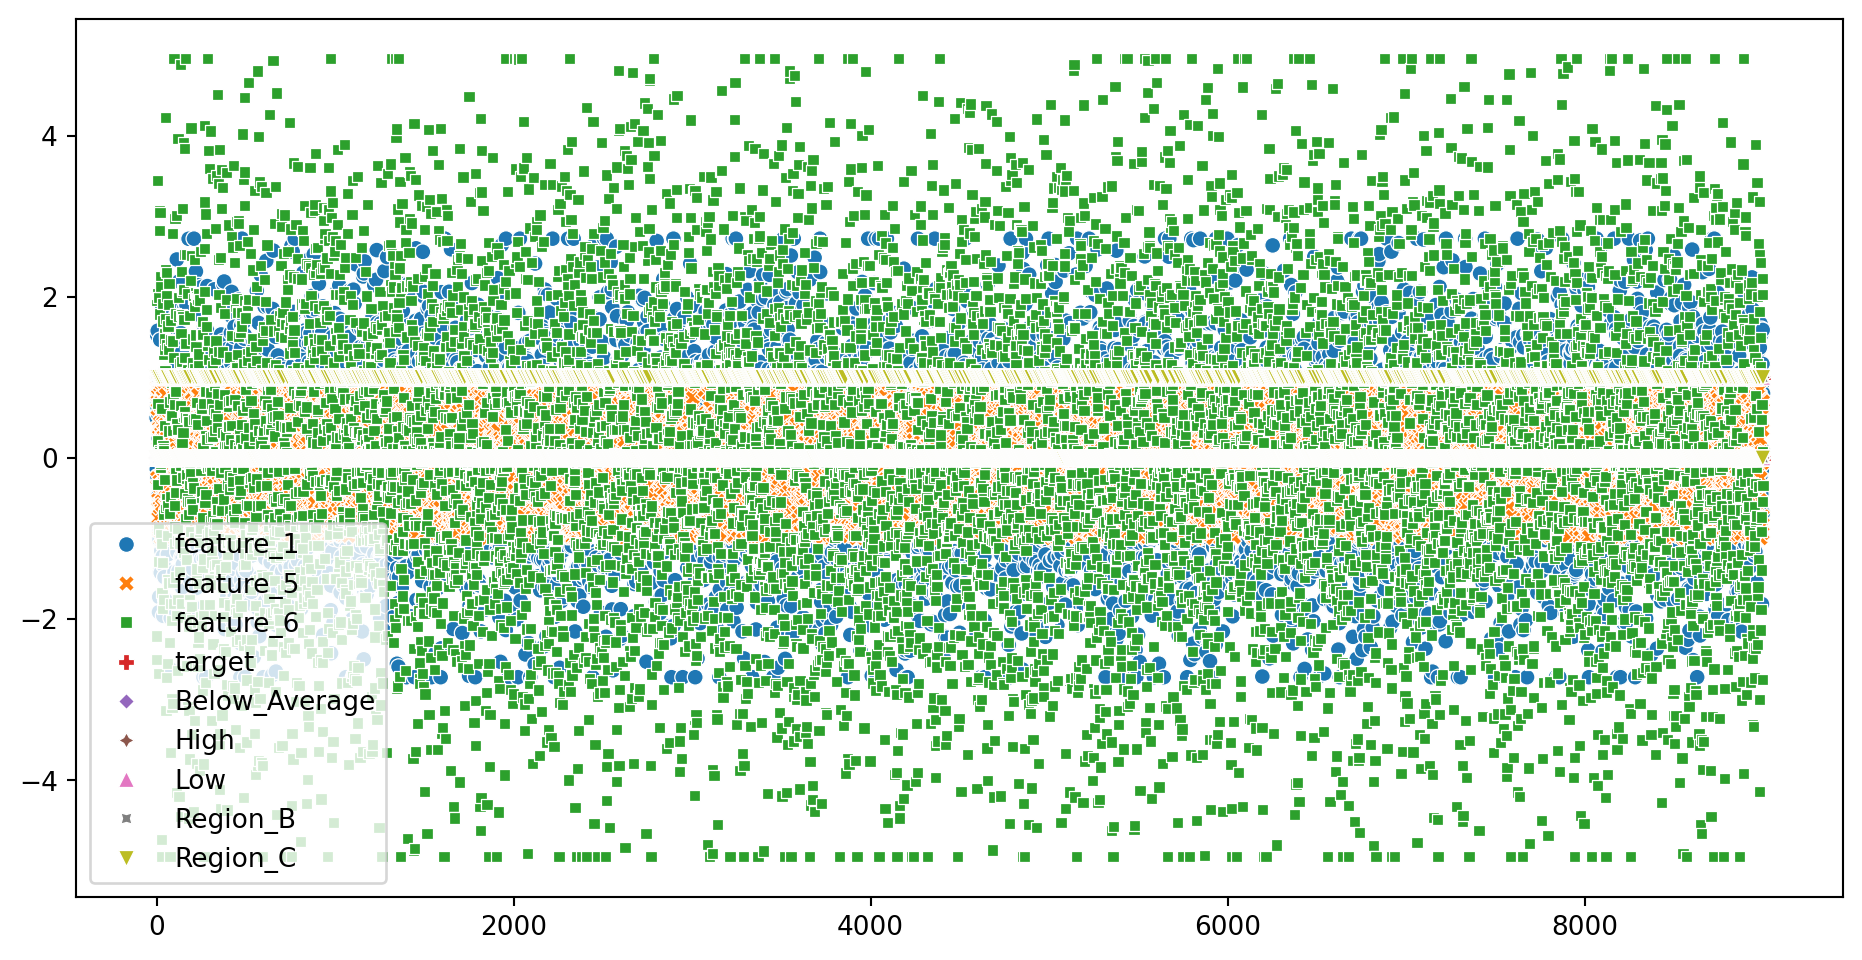

In [39]:
plt.figure(figsize=(12,6), dpi=190)
sb.scatterplot(data=df_model)

<Axes: xlabel='target', ylabel='count'>

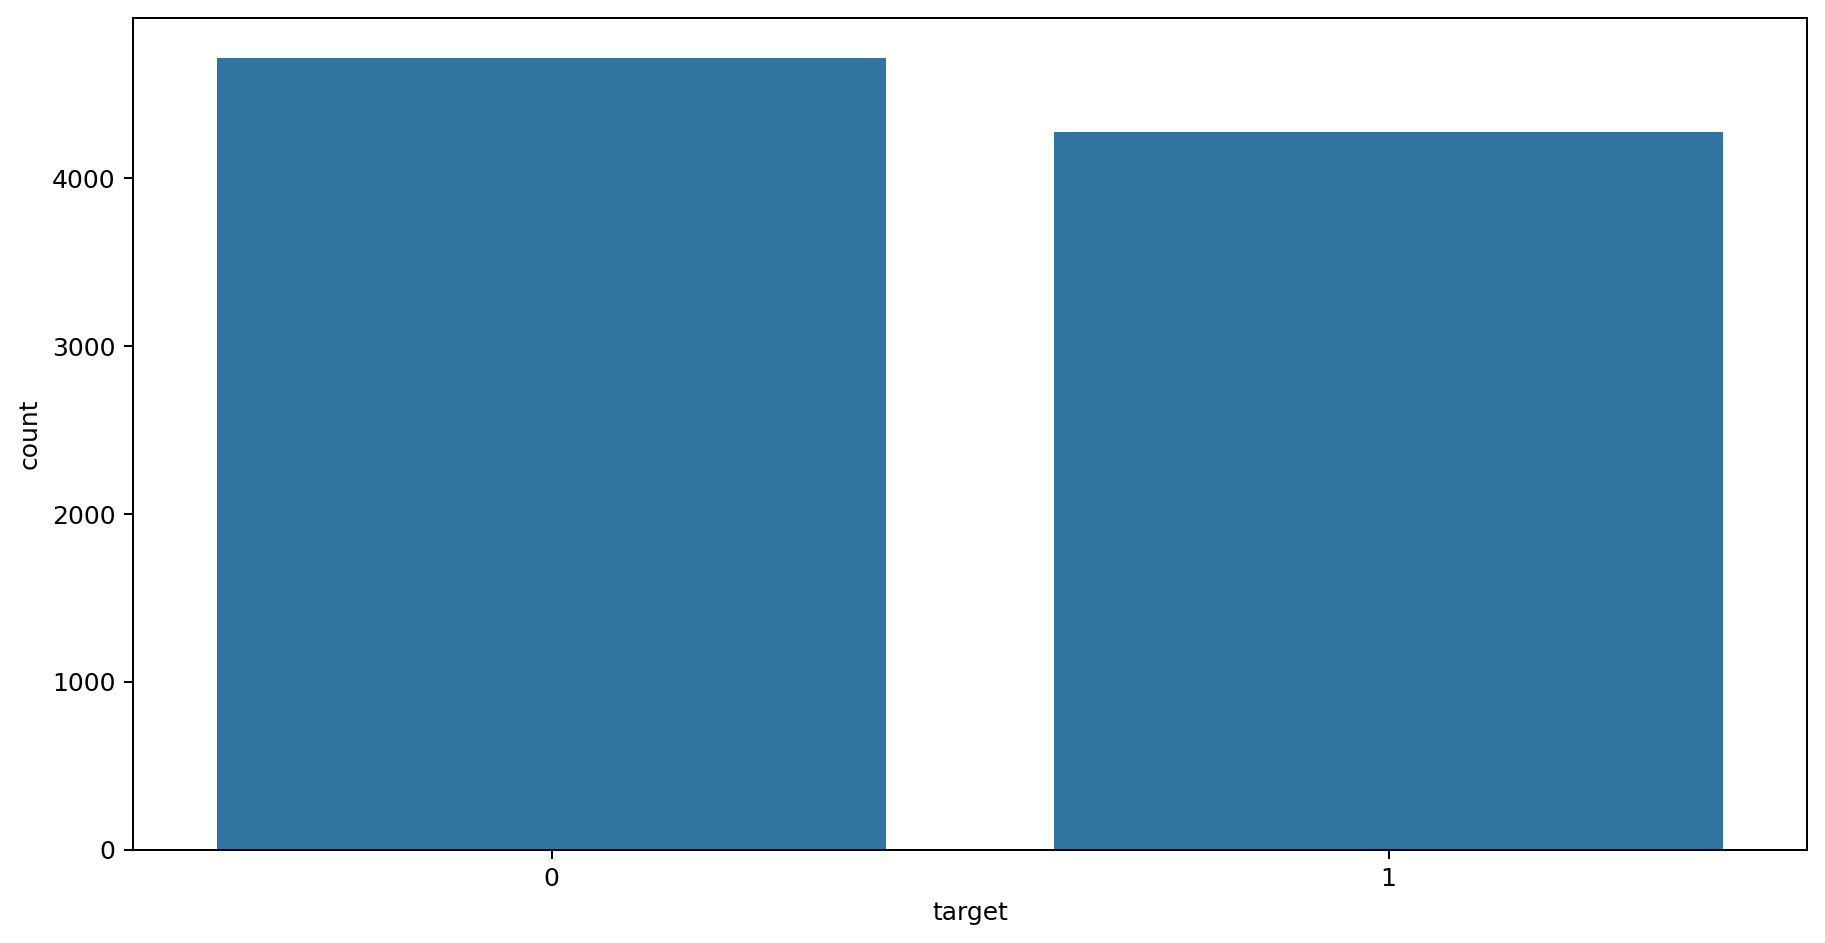

In [40]:
plt.figure(figsize=(12,6), dpi=180)
sb.countplot(data=df_model, x='target')

In [41]:
df_model.columns

Index(['feature_1', 'feature_5', 'feature_6', 'target', 'Below_Average',
       'High', 'Low', 'Region_B', 'Region_C'],
      dtype='object')

In [42]:
from sklearn.model_selection import train_test_split
X = df_model.drop('target', axis=1)
y = df_model['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=['float64']))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=['float64']))

In [44]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

In [45]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

for name, model in models.items():
    scores = cross_val_score(model, X_train_res, y_train_res, cv=5, scoring='f1')
    print(f"{name}: {scores.mean():.4f} (+/- {scores.std():.4f})")

Logistic Regression: 0.8595 (+/- 0.0140)
Random Forest: 0.8589 (+/- 0.0147)
Gradient Boosting: 0.8549 (+/- 0.0185)


In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_res, y_train_res)
print(grid_search.best_params_)

{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}


In [47]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       944
           1       0.84      0.85      0.84       856

    accuracy                           0.85      1800
   macro avg       0.85      0.85      0.85      1800
weighted avg       0.85      0.85      0.85      1800

ROC-AUC: 0.8482149928718519


/Users/ka53/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<Figure size 640x480 with 0 Axes>

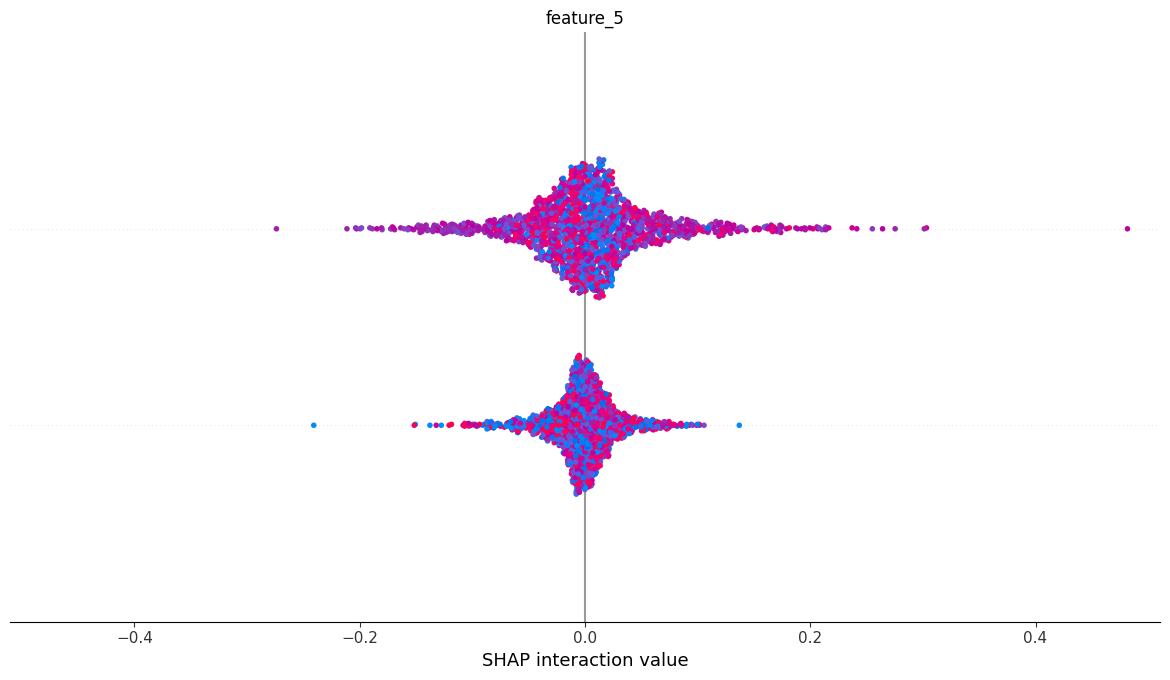

In [ ]:
import shap
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test_scaled)
shap.summary_plot(shap_values, X_test_scaled, feature_names=X_train.columns)

In [49]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

# Подготовка данных для chi2
X_cat = df[['category_1', 'category_2']].apply(LabelEncoder().fit_transform)
y_target = df['target']

# Вычисление chi2 статистики
chi2_scores, p_values = chi2(X_cat, y_target)

# Результаты
pd.DataFrame({
    'Feature': X_cat.columns,
    'Chi2 Score': chi2_scores,
    'P-value': p_values
}).sort_values('Chi2 Score', ascending=False)

,Feature,Chi2 Score,P-value
0,category_1,615.102376,8.689192e-136
1,category_2,0.183154,6.686770e-01


In [51]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

# Подготовка данных для chi2
X_cat = df[['feature_1','feature_5','feature_6']].apply(LabelEncoder().fit_transform)
y_target = df['target']

# Вычисление chi2 статистики
chi2_scores, p_values = chi2(X_cat, y_target)

# Результаты
pd.DataFrame({
    'Feature': X_cat.columns,
    'Chi2 Score': chi2_scores,
    'P-value': p_values
}).sort_values('Chi2 Score', ascending=False)

,Feature,Chi2 Score,P-value
0,feature_1,7.702139e+06,0.000000e+00
1,feature_5,8.239957e+02,3.273840e-181
2,feature_6,2.493289e+02,3.636999e-56


In [53]:
import json
from datetime import datetime

def log_metrics(model_name, params, metrics):
    log_entry = {
        'timestamp': datetime.now().isoformat(),
        'model': model_name,
        'parameters': params,
        'metrics': metrics
    }
    
    with open('model_logs.json', 'a') as f:
        json.dump(log_entry, f)
        f.write('\n')

# Пример использования после обучения модели
metrics = {
    'accuracy': 0.85,
    'roc_auc': 0.91,
    'f1_score': 0.85
}
log_metrics('RandomForest', {'n_estimators': 100}, metrics)

In [56]:
min_values = df.min(numeric_only=True)
print("Minimum values:\n", min_values)

Minimum values:
 feature_1   -2.720924
feature_2   -5.526868
feature_3   -3.892214
feature_4   -5.591048
feature_5   -0.999791
feature_6   -4.947744
feature_7   -2.848108
feature_8   -5.494586
target       0.000000
dtype: float64


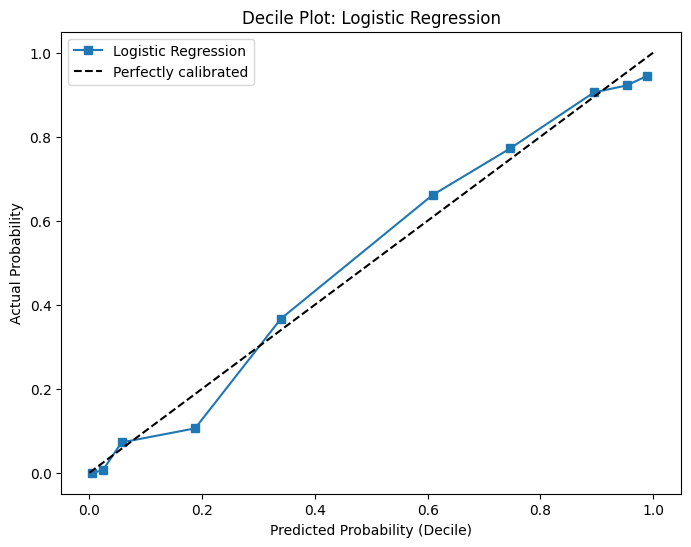

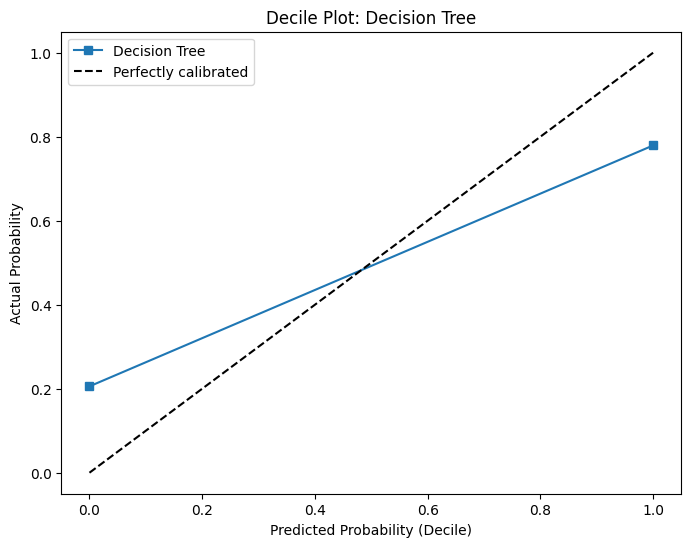

In [ ]:
from sklearn.calibration import calibration_curve
import numpy as np

def plot_decile_curve(y_true, y_proba, model_name):
    prob_true, prob_pred = calibration_curve(y_true, y_proba, n_bins=10, strategy='quantile')
    
    plt.figure(figsize=(8, 6))
    plt.plot(prob_pred, prob_true, 's-', label=model_name)
    plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
    plt.xlabel('Predicted Probability (Decile)')
    plt.ylabel('Actual Probability')
    plt.title(f'Decile Plot: {model_name}')
    plt.legend()
    plt.show()

# Для Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train, y_train)
plot_decile_curve(y_test, lr.predict_proba(X_test)[:,1], 'Logistic Regression')


# Для Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier().fit(X_train, y_train)
plot_decile_curve(y_test, dt.predict_proba(X_test)[:,1], 'Decision Tree')

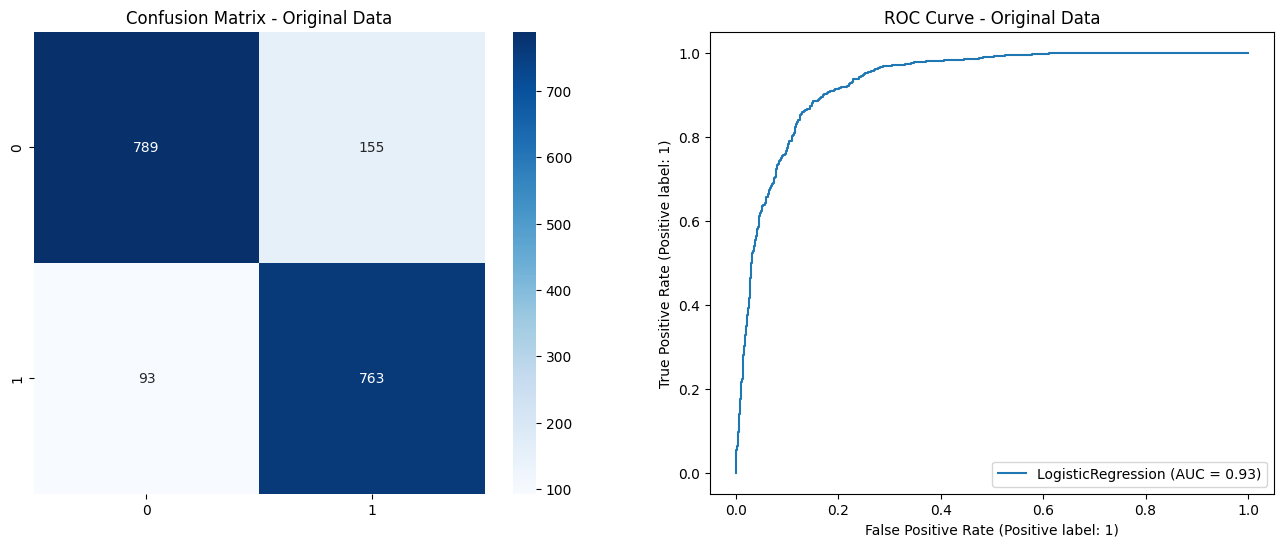

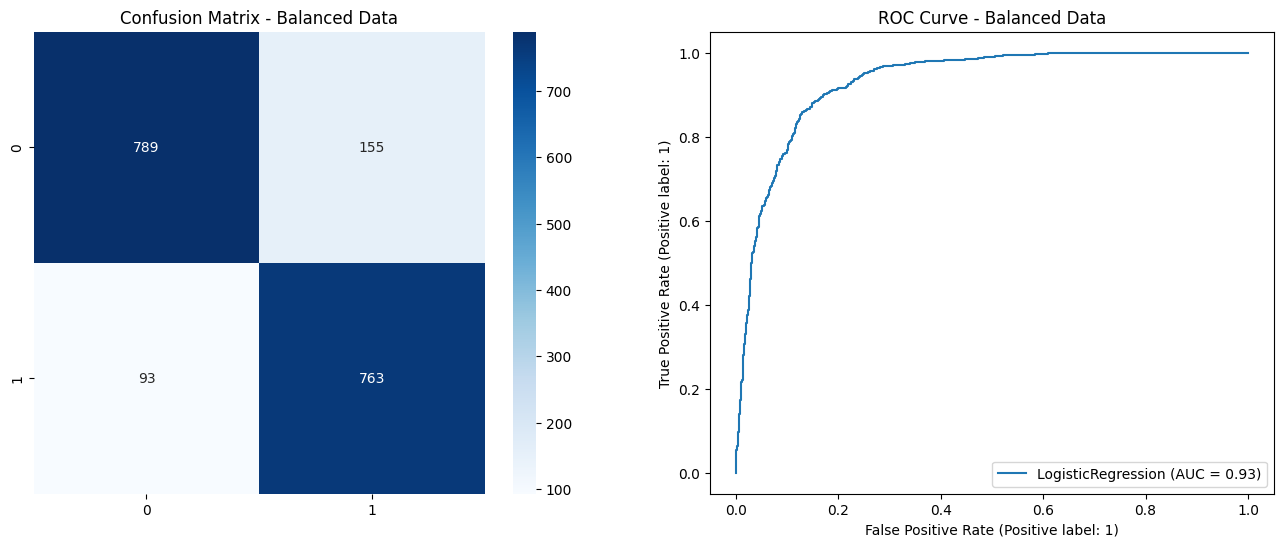

In [58]:
from sklearn.metrics import confusion_matrix, RocCurveDisplay

def plot_confusion_roc(model, X, y, case_name):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Confusion Matrix
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1)
    ax1.set_title(f'Confusion Matrix - {case_name}')
    
    # ROC Curve
    RocCurveDisplay.from_estimator(model, X, y, ax=ax2)
    ax2.set_title(f'ROC Curve - {case_name}')
    plt.show()

# Первый случай (например, до балансировки)
plot_confusion_roc(lr, X_test, y_test, 'Original Data')

# Второй случай (после балансировки)
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_res, y_res = smote.fit_resample(X_train, y_train)
lr_balanced = LogisticRegression().fit(X_res, y_res)
plot_confusion_roc(lr_balanced, X_test, y_test, 'Balanced Data')

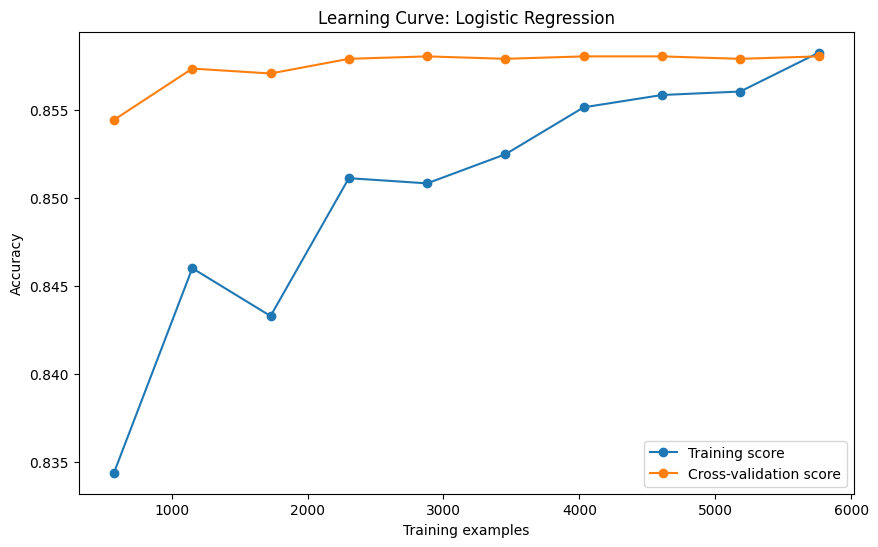

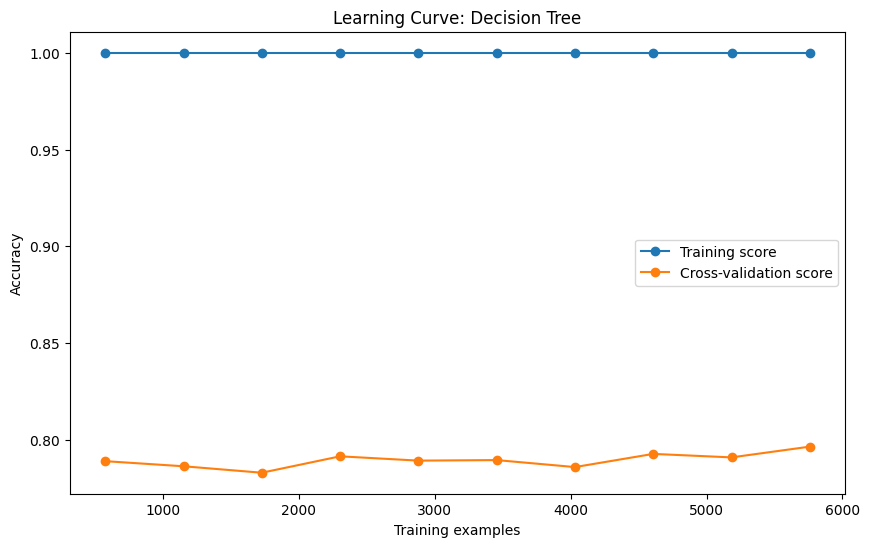

In [ ]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y, model_name):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='accuracy',
        train_sizes=np.linspace(0.1, 1.0, 10))
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
    plt.xlabel('Training examples')
    plt.ylabel('Accuracy')
    plt.title(f'Learning Curve: {model_name}')
    plt.legend()
    plt.show()

plot_learning_curve(lr, X_train, y_train, 'Logistic Regression')
plot_learning_curve(dt, X_train, y_train, 'Decision Tree') 

In [67]:
# После обучения модели (например, LogisticRegression)
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

# Получаем вероятности для класса 1 (второй столбец)
y_proba = model.predict_proba(X_test)[:, 1]  # Форма: (n_samples,)

In [68]:
from sklearn.calibration import CalibratedClassifierCV

# Калибровка модели для получения вероятностей
calibrated_model = CalibratedClassifierCV(model, cv=5, method='sigmoid')
calibrated_model.fit(X_train, y_train)
y_proba = calibrated_model.predict_proba(X_test)[:, 1]

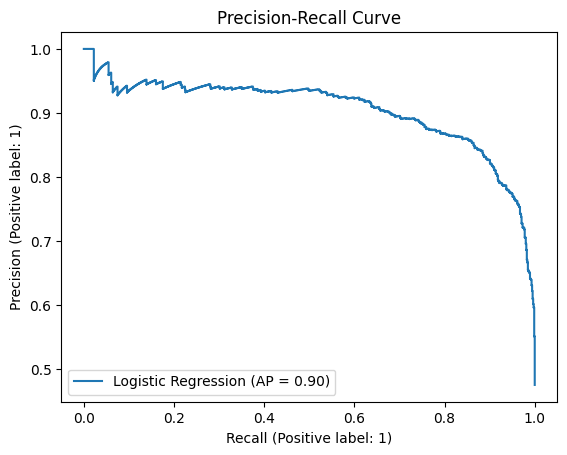

In [69]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_estimator(
    model, 
    X_test, 
    y_test,
    name="Logistic Regression"
)
plt.title('Precision-Recall Curve')
plt.show()

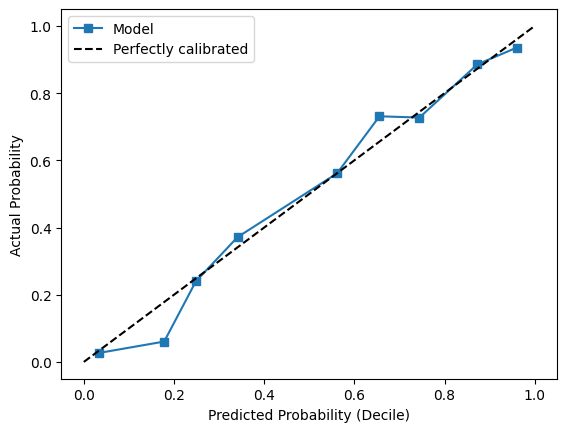

In [70]:
from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(y_test, y_proba, n_bins=10)

plt.plot(prob_pred, prob_true, 's-', label='Model')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
plt.xlabel('Predicted Probability (Decile)')
plt.ylabel('Actual Probability')
plt.legend()
plt.show()

In [71]:
from sklearn.metrics import brier_score_loss

brier = brier_score_loss(y_test, y_proba)
print(f"Brier Score: {brier:.4f}")  # Чем ближе к 0, тем лучше

Brier Score: 0.1025


In [72]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(verbose=0)
model.fit(X_train, y_train)

# Вероятности для класса 1
y_proba = model.predict_proba(X_test)[:, 1]  # Для CatBoost
# Или:
y_proba = model.predict(X_test, prediction_type='Probability')[:, 1]

# Аналогично для XGBoost:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)
y_proba = model.predict_proba(X_test)[:, 1]

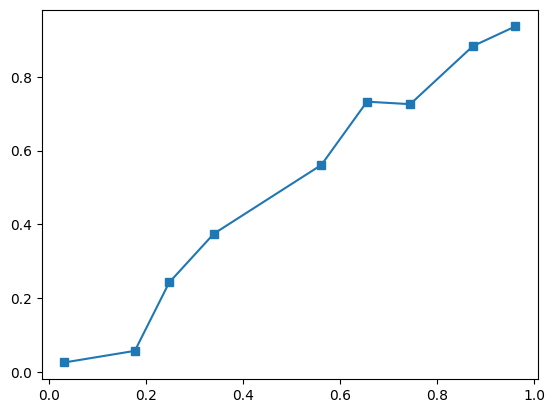

In [73]:
# Для Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_proba = lr.predict_proba(X_test)[:, 1]  # Теперь есть!

# Построение Decile Plot
prob_true, prob_pred = calibration_curve(y_test, y_proba, n_bins=10)
plt.plot(prob_pred, prob_true, 's-', label='LR')

Cohen's Kappa: 0.696
Brier Score: 0.102


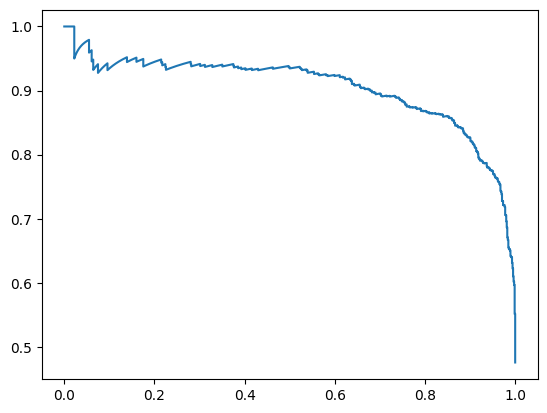

In [74]:
from sklearn.metrics import precision_recall_curve, cohen_kappa_score, brier_score_loss

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.plot(recall, precision, label='Logistic Regression')

# Cohen's Kappa
kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {kappa:.3f}")

# Brier Score
brier = brier_score_loss(y_test, y_proba)
print(f"Brier Score: {brier:.3f}")  # Чем ближе к 0, тем лучше

In [4]:
pwd

'/Users/ka53/Desktop/unime/ML exam'

In [3]:
# 1. Импорт библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, RocCurveDisplay
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import shap

# 2. Загрузка и первичный анализ данных
df = pd.read_csv('dataset.csv')
print(df.info())
print(df.describe())
print(df.isnull().sum())
print(df['category_1'].value_counts())
print(df['category_2'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_1   9000 non-null   float64
 1   feature_2   9000 non-null   float64
 2   feature_3   8600 non-null   float64
 3   feature_4   9000 non-null   float64
 4   feature_5   9000 non-null   float64
 5   feature_6   8500 non-null   float64
 6   feature_7   9000 non-null   float64
 7   feature_8   9000 non-null   float64
 8   category_1  9000 non-null   object 
 9   category_2  9000 non-null   object 
 10  target      9000 non-null   int64  
dtypes: float64(8), int64(1), object(2)
memory usage: 773.6+ KB
None
         feature_1    feature_2    feature_3    feature_4    feature_5  \
count  9000.000000  9000.000000  8600.000000  9000.000000  9000.000000   
mean      0.000427     0.003349     0.003235    -0.008481    -0.002177   
std       1.241318     2.508324     1.542901     2.061784     0.57741

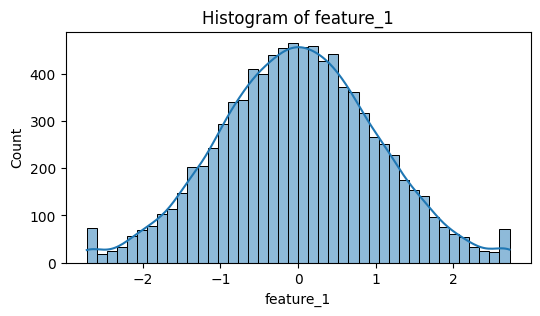

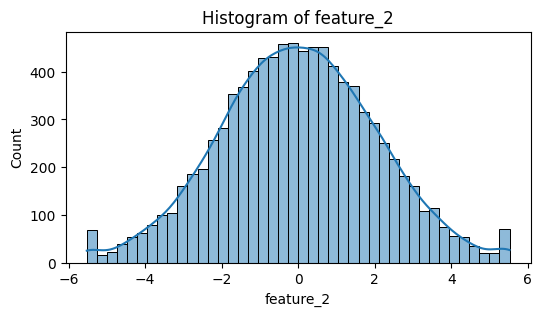

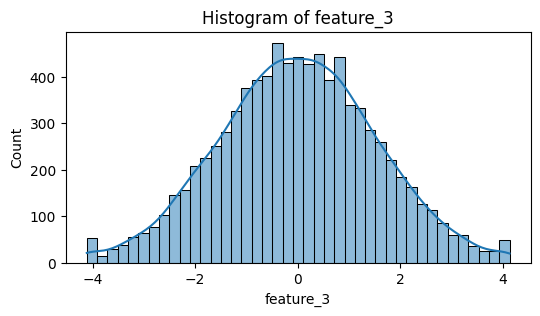

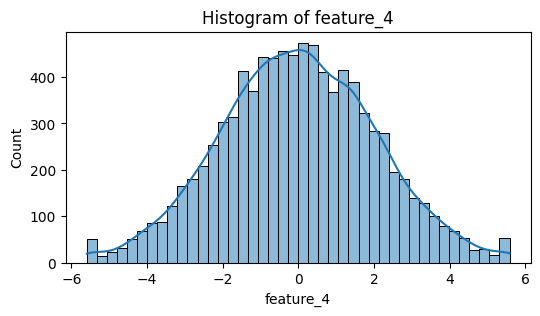

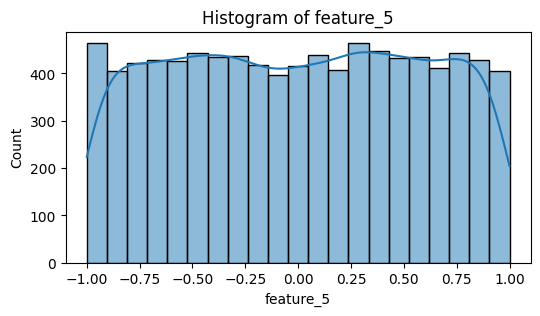

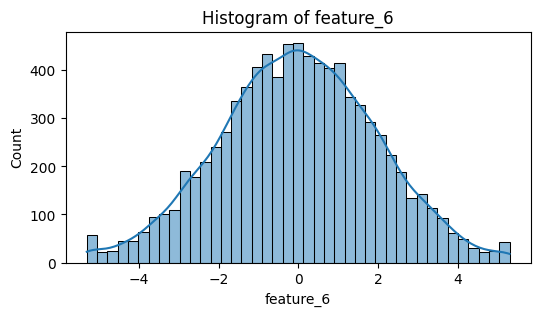

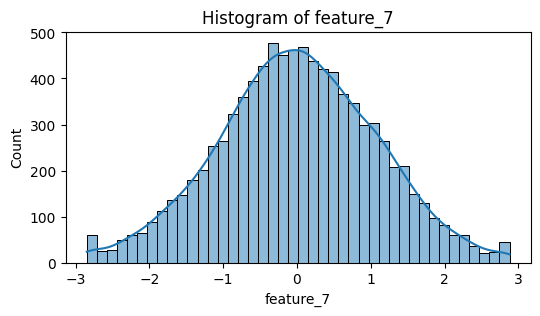

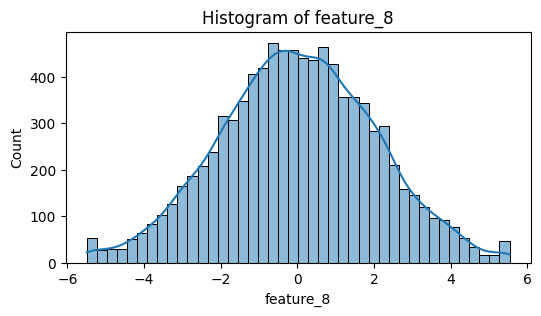

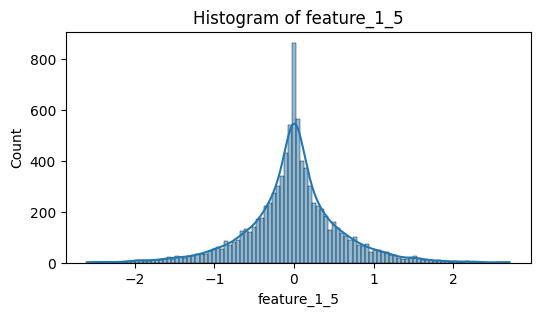

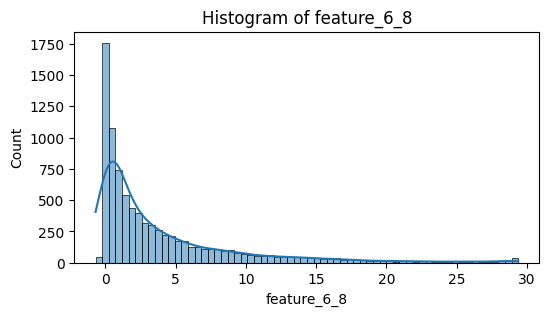

In [21]:
# 3. Визуализации для EDA
for col in df.select_dtypes(include='float64').columns:
    plt.figure(figsize=(6, 3))
    sb.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()


In [24]:
df = df.drop(columns=['category_1','category_2'])
df_c = df.corr()

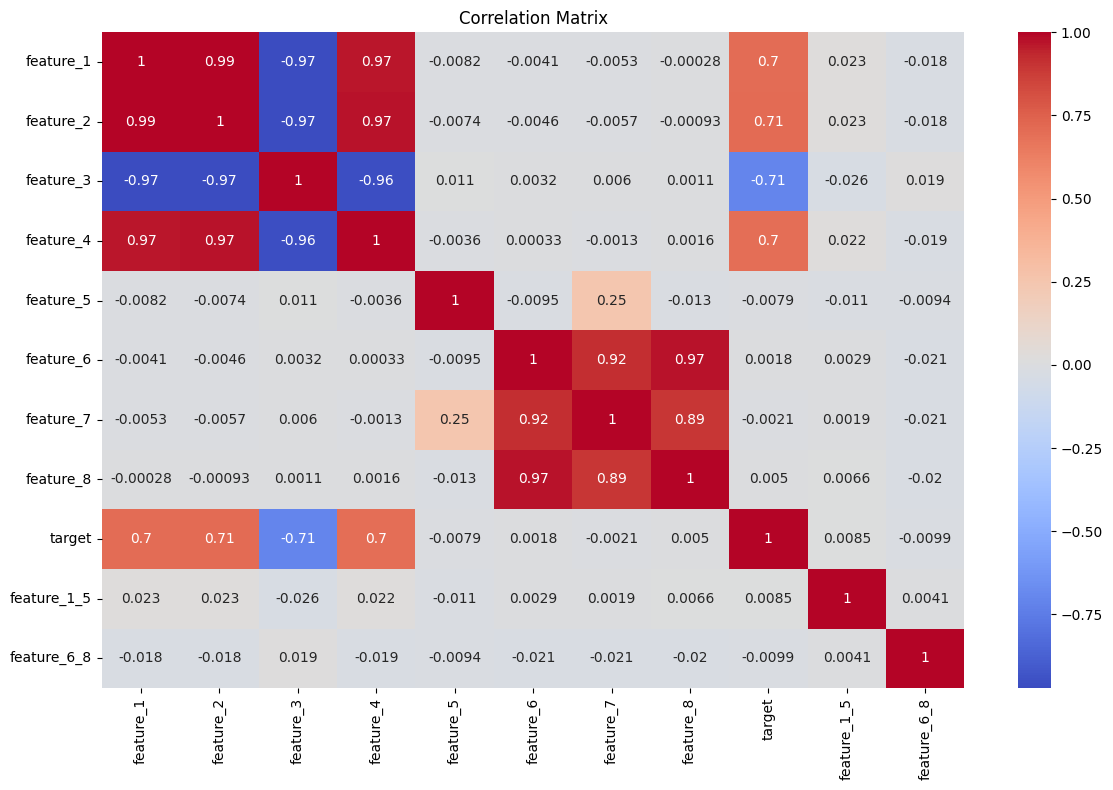

In [27]:
plt.figure(figsize=(12,8))
sb.heatmap(df_c, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [6]:
# 4. Функция для обработки выбросов (winsorization)
def winsorize(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return column.clip(lower, upper)
num_features = ['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8']
for col in num_features:
    df[col] = winsorize(df[col])

In [7]:
# 5. Feature Engineering (пример: взаимодействие признаков)
df['feature_1_5'] = df['feature_1'] * df['feature_5']
df['feature_6_8'] = df['feature_6'] * df['feature_8']

In [8]:
# 6. Разделение на признаки и целевую переменную
X = df.drop('target', axis=1)
y = df['target']


In [13]:
# 7. Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [9]:
# 8. Определение признаков
num_features = ['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_1_5', 'feature_6_8']
cat_features = ['category_1', 'category_2']

In [10]:
# 9. Препроцессинг
num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
cat_transformer = Pipeline([
    ('onehot', OneHotEncoder(drop='first'))
])
preprocessor = ColumnTransformer([
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])


In [11]:

# 10. Модели
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

In [14]:
# 11. Pipeline с балансировкой классов
for name, model in models.items():
    pipe = ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])
    scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='f1')
    print(f"{name}: {scores.mean():.4f} (+/- {scores.std():.4f})")


Logistic Regression: 0.8496 (+/- 0.0141)
Random Forest: 0.8671 (+/- 0.0073)
Gradient Boosting: 0.8719 (+/- 0.0120)


In [15]:
# 12. GridSearch для RandomForest
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [2, 5]
}
rf_pipe = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])
grid_search = GridSearchCV(rf_pipe, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
print("Best params:", grid_search.best_params_)


Best params: {'classifier__max_depth': 10, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}


In [16]:
# 13. Оценка на тестовой выборке
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       944
           1       0.89      0.86      0.88       856

    accuracy                           0.89      1800
   macro avg       0.89      0.89      0.89      1800
weighted avg       0.89      0.89      0.89      1800

ROC-AUC: 0.8850487090131476


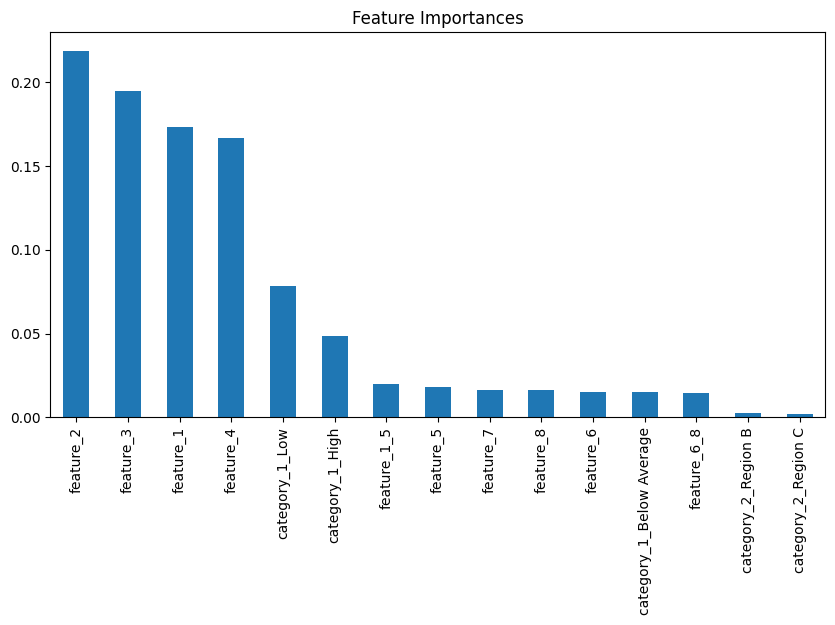

In [17]:
# 14. Важность признаков
if hasattr(best_model.named_steps['classifier'], 'feature_importances_'):
    feature_names = (
        num_features +
        list(best_model.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(cat_features))
    )
    importances = best_model.named_steps['classifier'].feature_importances_
    feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
    plt.figure(figsize=(10, 5))
    feat_imp.plot(kind='bar')
    plt.title('Feature Importances')
    plt.show()

<Figure size 640x480 with 0 Axes>

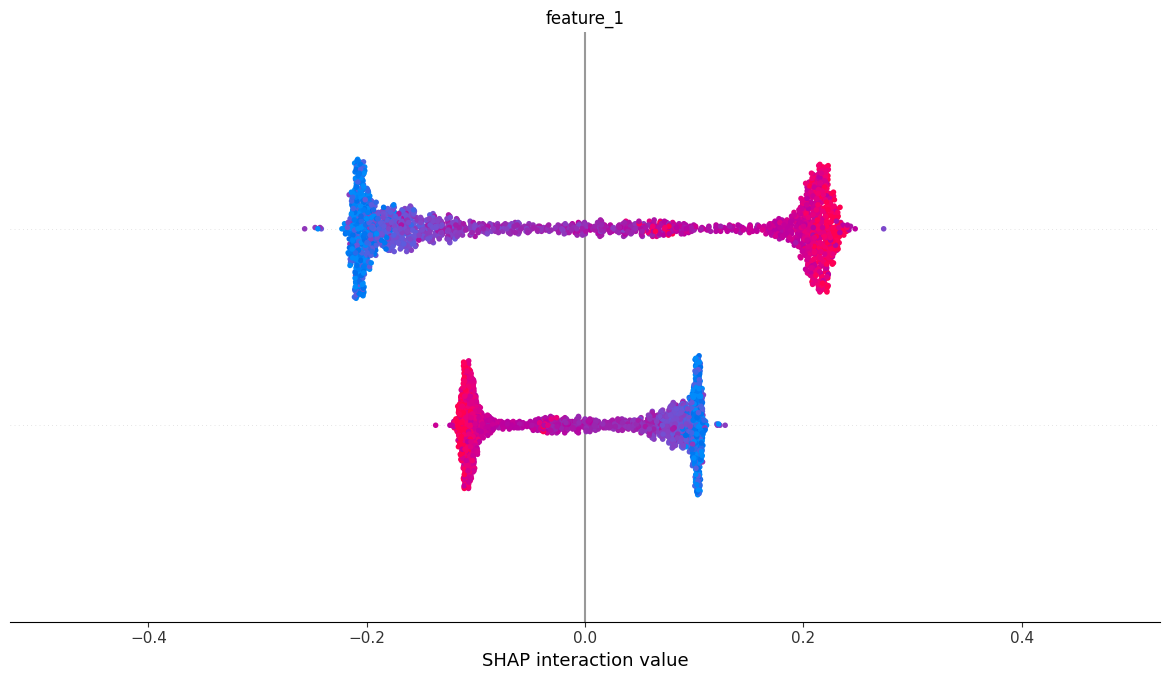

In [18]:

# 15. SHAP для интерпретации (пример для Random Forest)
explainer = shap.TreeExplainer(best_model.named_steps['classifier'])
X_test_transformed = best_model.named_steps['preprocessor'].transform(X_test)
shap_values = explainer.shap_values(X_test_transformed)
shap.summary_plot(shap_values, X_test_transformed, feature_names=feature_names)

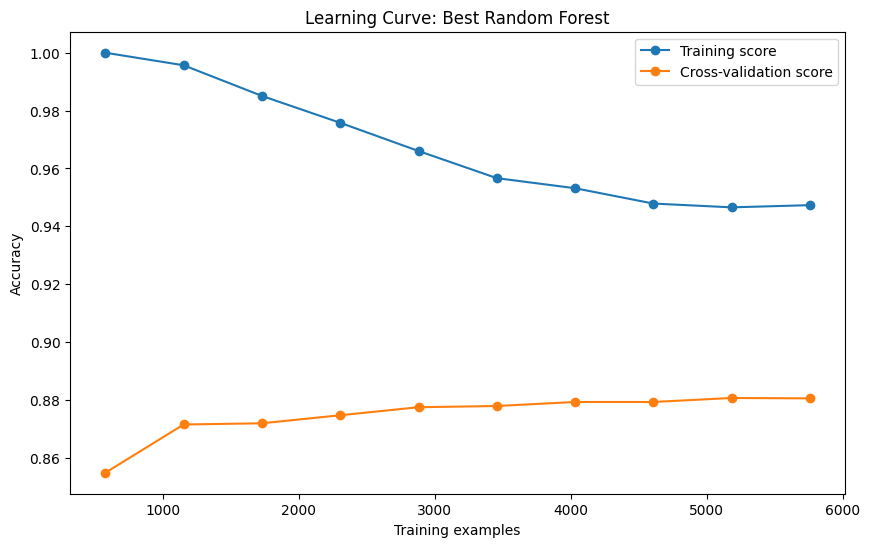

In [19]:
# 16. Кривые обучения
def plot_learning_curve(model, X, y, model_name):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='accuracy',
        train_sizes=np.linspace(0.1, 1.0, 10)
    )
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
    plt.xlabel('Training examples')
    plt.ylabel('Accuracy')
    plt.title(f'Learning Curve: {model_name}')
    plt.legend()
    plt.show()

plot_learning_curve(best_model, X_train, y_train, 'Best Random Forest')


In [20]:

# 17. Сохранение модели
import joblib
joblib.dump(best_model, 'best_model.pkl')


['best_model.pkl']